In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spicy import constants
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr

In [2]:
session = WolframLanguageSession()

In [3]:
i = 1j
pi = np.pi
h = constants.Planck
hbar = constants.hbar
epsilon_0 = constants.epsilon_0
m_p = constants.m_p
m_e = constants.m_e
m_n = constants.m_n
e_c = constants.elementary_charge

hypergeometric function of second kind:
$U(a, b, z) = \frac{1}{\Gamma(a)}\int_0^\infty e^{-zt} t^{a-1}(1+t)^{b-a-1}dt$

In [4]:
# One entry
def U_x(x, k, kp):
    arg = "k:="+str(k).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    arg = "kp:="+str(kp).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    session.evaluate('f[x_]:=HypergeometricU[1-(kp*\[ImaginaryI])/(k*2),2,2*k*x*\[ImaginaryI]]* E^(-k*\[ImaginaryI]*x) * x')
    arg = "N[f["+str(x).replace('e', "*10^")+"]]"
    U_numeric = session.evaluate(wlexpr(arg)) 
    U_complex = complex(U_numeric[0], U_numeric[1])
    return U_complex

def Up_x(x, k, kp):
    arg = "k:="+str(k).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    arg = "kp:="+str(kp).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    session.evaluate('f[x_]:=HypergeometricU[1-(kp*\[ImaginaryI])/(k*2),2,2*k*x*\[ImaginaryI]]* E^(-k*\[ImaginaryI]*x) * x')
    arg = "N[f'["+str(x).replace('e', "*10^")+"]]"
    Up_numeric = session.evaluate(wlexpr(arg)) 
    Up_complex = complex(Up_numeric[0], Up_numeric[1])
    return Up_complex  

In [5]:
def B(A, kappa, k ,kp, a):
    num = A*np.exp(2*i*a*kappa)*(kappa*U_x(a, k, kp) + i*Up_x(a, k, kp))
    den = kappa*U_x(a, k, kp) - i*Up_x(a, k, kp)
    return (num/den)

def C(A, kappa, k ,kp, a):
    num =  2*np.exp(i*a*kappa)*A*kappa
    den = kappa*U_x(a, k, kp) - i*Up_x(a, k, kp)
    return (num/den)

In [6]:
def wavefun_1(x, a, kappa, k, kp, A):
    r = A * np.exp(i*kappa*x)
    r += B(A,kappa,k,kp,a) * np.exp(-i*kappa*x)
    return r

def wavefun_2(x, a, kappa, k, kp, A):
    return C(A,kappa,k,kp,a) * U_x(x, k, kp)

In [30]:
def kappa(m, Q, V0):
    r = 2*m*(Q+V0)
    r /= hbar**2
    return np.sqrt(r)

def k(m, Q):
    r = 2*m*Q
    r /= hbar**2
    return np.sqrt(r)

def kp(m, Z):
    r = m*(Z-2)*(e_c**2) #Because an alpha particle has 2 protons and 2 nucleus, the atomic number of the daughter nucleus is Z-2
    r /= pi*epsilon_0*(hbar**2)
    return r

Example for $^{224}Th$


In [31]:
A = 1
a = 7.22e-15
b = 2.34e-14
Z = 90
Q =  1.42433e-12
V0 = 5.6076e-12
m = 4 * 1.66053906660e-27
k = k(m,Q)
kappa = kappa(m,Q,V0)
kp = kp(m,Z)

In [64]:
def plot_wavefun(d2center_1 = None, Re_psi1 = None, d2center_2 = None, Re_psi2 = None, y_min = None, y_max = None):

    # Create a Matplotlib figure and axis
    fig, ax = plt.subplots()

    if d2center_1 is not None and Re_psi1 is not None:
        ax.plot(d2center_1, Re_psi1, color='purple')

    if d2center_2 is not None and Re_psi2 is not None:
        ax.plot(d2center_2, Re_psi2, color='purple')

    if y_min is not None and y_max is not None:  
        ax.set_ylim(y_min, y_max)

    ax.set_ylabel('Re(psi)') 
    ax.set_xlabel('X(m)') 

    plt.show()
    
    return

In [55]:
d2center_1 = np.linspace(0, a, 200)
Re_psi1 = [(wavefun_1(d2center, a, kappa, k, kp, A).real) for d2center in d2center_1]

In [56]:
d2center_2 = np.linspace(a, 1.6*a, 200)
Re_psi2 = [(wavefun_2(d2center, a, kappa, k, kp, A).real) for d2center in d2center_2]

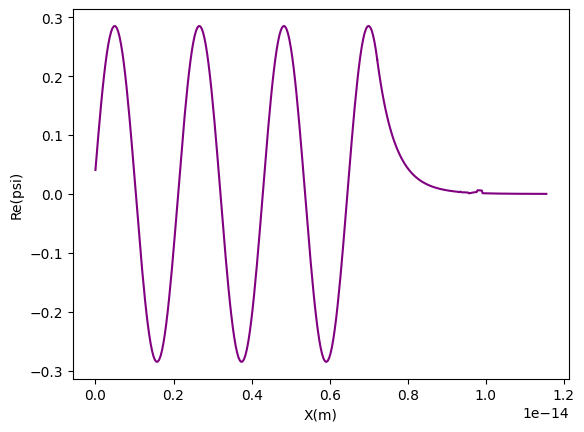

In [57]:
plot_wavefun(d2center_1, Re_psi1, d2center_2, Re_psi2)

In [58]:
d2center_2 = np.linspace(a, b, 100)
Re_psi2 = [(wavefun_2(d2center, a, kappa, k, kp, A).real) for d2center in d2center_2]

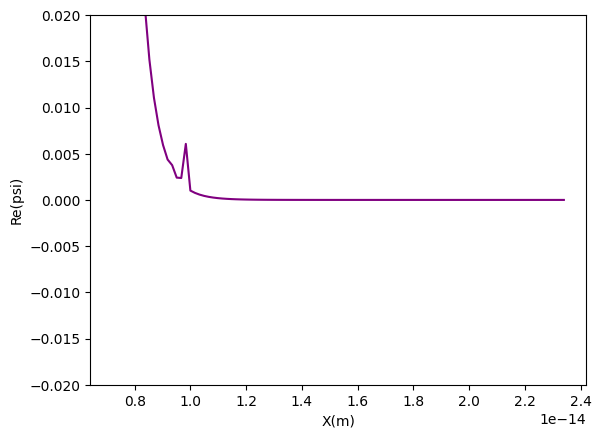

In [59]:
plot_wavefun(d2center_2=d2center_2, Re_psi2=Re_psi2, y_min=-2e-2, y_max=2e-2)

In [62]:
d2center_2 = np.linspace(b, 3*b, 100)
Re_psi2 = [(wavefun_2(d2center, a, kappa, k, kp, A).real) for d2center in d2center_2]

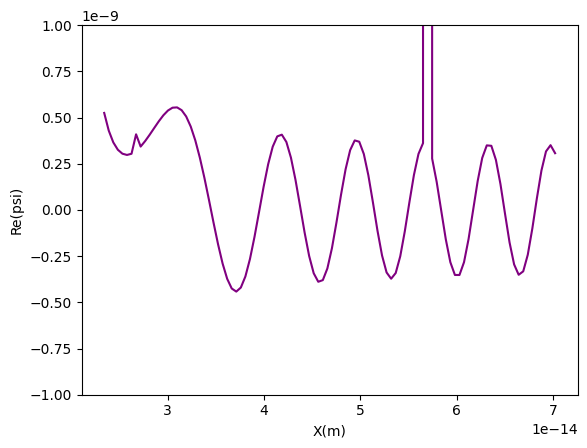

In [65]:
plot_wavefun(d2center_2=d2center_2, Re_psi2=Re_psi2, y_min=-1e-9, y_max=1e-9)

In [71]:
d2center_2 = np.linspace(a, 2*b, 70)
Re_psi2 = [(wavefun_2(d2center, a, kappa, k, kp, A).real) for d2center in d2center_2]

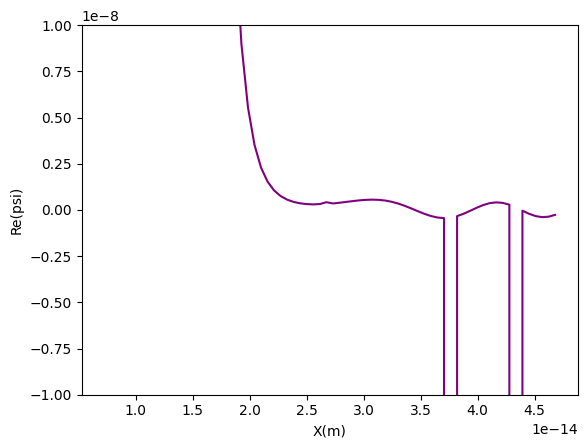

In [74]:
plot_wavefun(d2center_2=d2center_2, Re_psi2=Re_psi2, y_min=-1e-8, y_max=1e-8)